In [9]:
import zipfile

zip_path = "/content/drive/MyDrive/archive.zip"
extract_to = "/content/dataset"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)


In [18]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D, MaxPooling2D, Flatten,BatchNormalization,Dropout



In [11]:
# generators (divides data into batches)
train_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/dataset/train",
    labels = "inferred",
    label_mode = "int",
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/dataset/test",
    labels = "inferred",
    label_mode = "int",
    batch_size = 32,
    image_size = (256,256)
)
#these images are stored in numpy array 0-255

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [12]:
# normalize (divide it by 255 so we get 0 and 1)
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)
#to get pixels values in 0 and 1

In [19]:
#cnn model

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [21]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 79ms/step - accuracy: 0.5640 - loss: 2.7473 - val_accuracy: 0.5520 - val_loss: 1.3028
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 76ms/step - accuracy: 0.6710 - loss: 0.6179 - val_accuracy: 0.6888 - val_loss: 0.5977
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.7464 - loss: 0.5179 - val_accuracy: 0.7826 - val_loss: 0.4644
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 77ms/step - accuracy: 0.7905 - loss: 0.4546 - val_accuracy: 0.7400 - val_loss: 0.5697
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 83ms/step - accuracy: 0.8246 - loss: 0.3939 - val_accuracy: 0.8042 - val_loss: 0.4178
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 78ms/step - accuracy: 0.8526 - loss: 0.3343 - val_accuracy: 0.7990 - val_loss: 0.4337
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - accuracy: 0.8896 - loss: 0.2597 - val_accuracy: 0.7762 - val_loss: 0.5380
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 87s 83ms/step - accuracy: 0.9284 - loss: 0.1892 - 

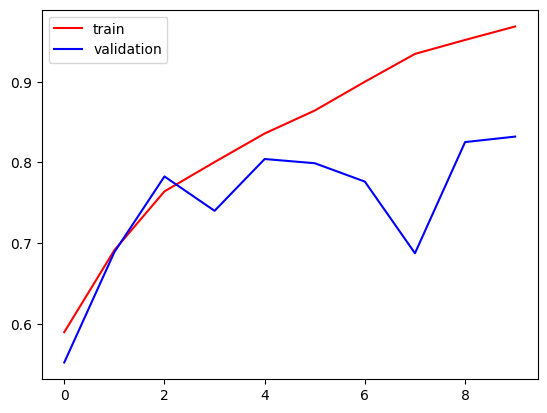

In [24]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()
#before


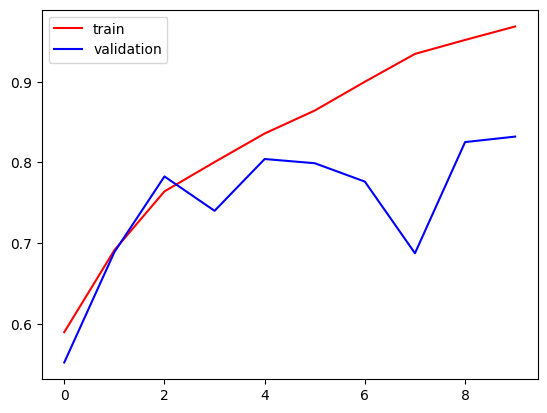

In [22]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()
#after using batch normalization and dropout

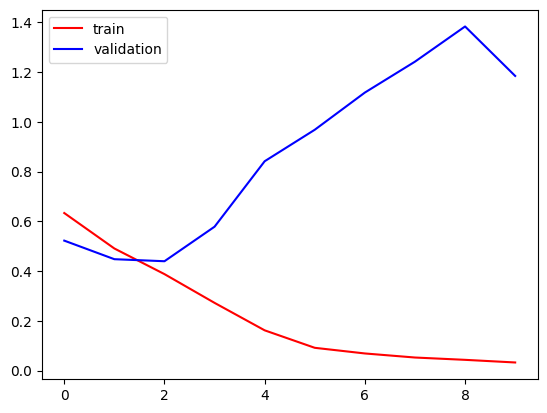

In [17]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()
#before

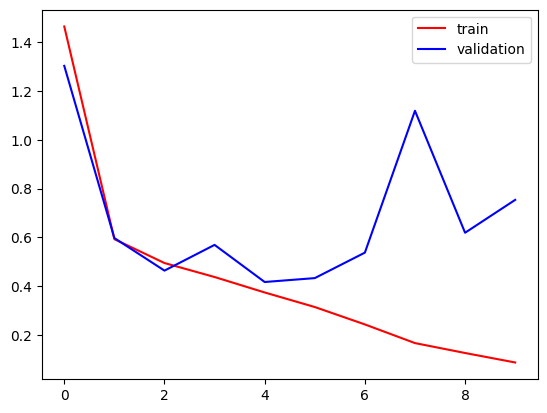

In [23]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()
#after

In [ ]:
# with the help of the graphs we can see some overfitting which means result on training data is good but not on testing data


In [25]:
import cv2

In [26]:
test_img = cv2.imread("/content/drive/MyDrive/beautiful-golden-retriever-cute-puppy-600nw-2526542701.webp")

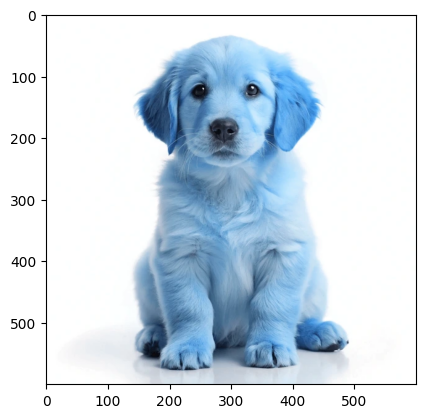

In [27]:
plt.imshow(test_img)


In [28]:
test_img = cv2.resize(test_img,(256,256))
#resizing image

In [33]:
test_input = test_img.reshape((1,256,256,3))

In [34]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 952ms/step


array([[1.]], dtype=float32)